In [2]:
import numpy as np
X = np.array([[1, 1], [2, 1], [3, 1.2], [4, 1], [5, 0.8], [6, 1]])
from sklearn.decomposition import NMF
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

In [4]:
print(H)
import pandas as pd

[[2.09783018 0.30560234]
 [2.13443044 2.13171694]]


In [94]:
training = pd.read_csv(r"C:\Users\Tim Huang\Desktop\Research\HI-union.train0.MCMC.k4.nb.txt", sep='\t')
trainingX = training[['1','2','3','4','5','6']].to_numpy()
trainingModel = NMF(n_components=2, init = 'random', solver = 'mu', max_iter = 2000).fit(trainingX)

trainH = trainingModel.components_
trainW = trainingModel.fit_transform(trainingX)


In [95]:
print(trainH)

[[6.52225702e-01 3.27368808e-01 6.15481892e-02 6.77768328e-01
  4.08058189e+00 3.27898137e-01]
 [2.25991143e-01 5.09221898e+00 1.10757205e-02 3.90041072e-01
  1.91107811e-01 6.42032610e-05]]


In [96]:
trainingY = training[['8']].to_numpy().T[0] #labels
import matplotlib.pyplot as plt

In [8]:
colourDict = {0: 'b',
              1: 'r'}
colours = [colourDict[b] for b in trainingY]

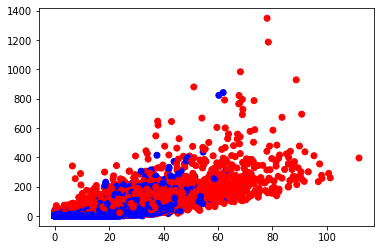

In [11]:
fig, ax = plt.subplots()
ax.scatter(trainW[:,0], trainW[:,1], c= colours)


plt.show()

In [97]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

testing = pd.read_csv(r"C:\Users\Tim Huang\Desktop\Research\HI-union.test0.MCMC.k4.nb.txt", sep='\t')
testingX = testing[['1','2','3','4','5','6']].to_numpy()
testingY = testing[['8']].to_numpy().T[0]


lda = LDA(n_components=1)
X_train = lda.fit_transform(trainingX, trainingY)
X_test = lda.transform(testingX)


In [98]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, trainingY)
y_pred = classifier.predict(X_test)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [99]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(testingY, y_pred)
print(cm)
print('Accuracy:', str(accuracy_score(testingY, y_pred)))

[[4119830    2821]
 [  37483   14616]]
Accuracy: 0.990345769207737


In [100]:
testW = trainingModel.transform(testingX)

In [101]:
classifierNMF = RandomForestClassifier(max_depth=3, random_state=0)

classifierNMF.fit(trainW, trainingY)
y_predNMF = classifierNMF.predict(testW)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [102]:
cm = confusion_matrix(testingY, y_predNMF)
print(cm)
print('Accuracy:', str(accuracy_score(testingY, y_predNMF)))

[[4121996     655]
 [  50354    1745]]
Accuracy: 0.9877815438050183


# Following is not with own data set #

In [42]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [43]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

     principal component 1  principal component 2          target
0                -2.264542               0.505704     Iris-setosa
1                -2.086426              -0.655405     Iris-setosa
2                -2.367950              -0.318477     Iris-setosa
3                -2.304197              -0.575368     Iris-setosa
4                -2.388777               0.674767     Iris-setosa
..                     ...                    ...             ...
145               1.870522               0.382822  Iris-virginica
146               1.558492              -0.905314  Iris-virginica
147               1.520845               0.266795  Iris-virginica
148               1.376391               1.016362  Iris-virginica
149               0.959299              -0.022284  Iris-virginica

[150 rows x 3 columns]


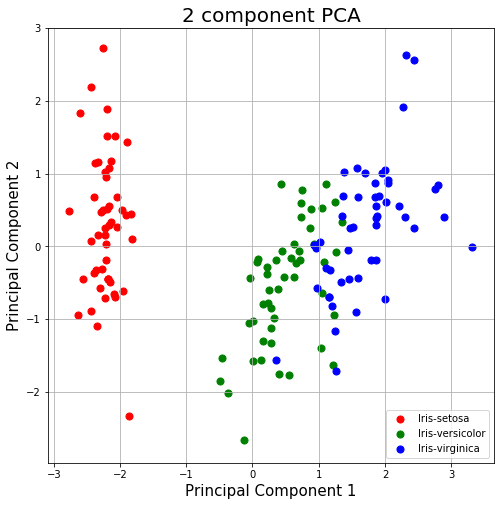

In [60]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
print(finalDf)

In [78]:
trainingModel = NMF(n_components=2, init = 'random', solver = 'mu', max_iter = 20000, tol = 0, shuffle = True).fit(x)

trainH = trainingModel.components_
trainW = trainingModel.fit_transform(x)

principalDf = pd.DataFrame(data = trainW
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
print(trainingModel.reconstruction_err_ )

5.47079968183384


     principal component 1  principal component 2          target
0                 0.240958               1.903489     Iris-setosa
1                 0.399521               1.266045     Iris-setosa
2                 0.255303               1.504128     Iris-setosa
3                 0.302100               1.368900     Iris-setosa
4                 0.176165               2.021600     Iris-setosa
..                     ...                    ...             ...
145               2.057570               1.272325  Iris-virginica
146               2.010710               0.633510  Iris-virginica
147               1.913635               1.265157  Iris-virginica
148               1.804029               1.734352  Iris-virginica
149               1.692777               1.230981  Iris-virginica

[150 rows x 3 columns]


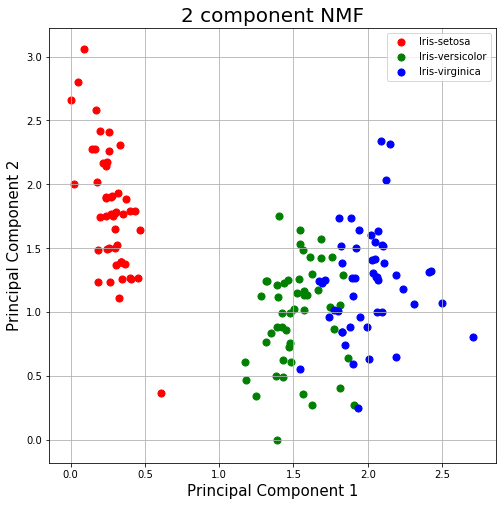

In [79]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component NMF', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
print(finalDf)
